In [1]:
#logistic regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
arr = np.array([2,3,4,5,6])
b = np.array([0,0,4,5,2])

arr.reshape(1,5)
arr

array([2, 3, 4, 5, 6])

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784')


C:\Users\informatika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
len(mnist.data)
X, y = mnist.data, mnist.target
X = X.values
y = y.values
y = y.astype("float")
def viz(n):
    plt.imshow(X[n].reshape(28,28))


In [4]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42) 
#method 2 
num_split = 60000

X_train, X_test, y_train, y_test = X[:num_split], X[num_split:], y[:num_split], y[num_split:]

shuffle_index = np.random.permutation(num_split)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]


False


False

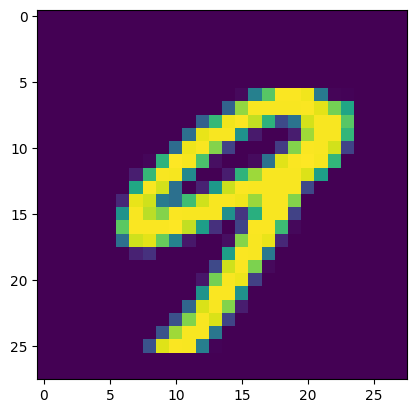

In [5]:
#binary clasification:
y_train_0 = (y_train == 0)
y_test_0 = (y_test == 0)
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(random_state=0)
clf.fit(X_train, y_train_0)
viz(1005)
print(y_train_0[1005])
clf.predict(X_train)[1005]


In [6]:
#performance analysis
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, shuffle=True,random_state=0)
for train_index, test_index in skfolds.split(X_train, y_train_0):
    clone_clf = clone(clf)
    X_train_fold = X_train[train_index]
    y_train_folds = y_train_0[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_0[test_index]
    clone_clf.fit(X_train_fold, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

0.98395
0.9838
0.9862


In [7]:
from sklearn.model_selection import cross_val_score
scroe = cross_val_score(clf, X_train, y_train_0, cv=5, scoring="accuracy")
scroe

array([0.98441667, 0.98941667, 0.9895    , 0.988     , 0.98741667])

In [8]:
from sklearn.model_selection import cross_val_predict
y_train_pred= cross_val_predict(clf, X_train, y_train_0, cv=3)



In [9]:
from sklearn.metrics import confusion_matrix
print(len(y_train_0))
confusion_matrix(y_train_0, y_train_pred)

60000


array([[53644,   433],
       [  280,  5643]], dtype=int64)

In [10]:
np.random.seed(0)
clf = SGDClassifier(random_state=0)
clf.fit(X_train, y_train_0)


SGDClassifier(random_state=0)

In [12]:

#y[1001]
y_scores = clf.decision_function(X_train[1340].reshape(1, -1))
a = clf.decision_function(X[1340].reshape(1,-1))
s = cross_val_predict(clf, X_train, y_train_0, cv=3, method='decision_function')
s

array([-25643.95080014, -28615.78520818, -64633.54440495, ...,
       -24461.80164484, -13229.66775023, -60499.28326727])

In [14]:
y_scores = cross_val_predict(clf, X_train, y_train_0, cv=3,  method='decision_function')
y_scores

array([-25643.95080014, -28615.78520818, -64633.54440495, ...,
       -24461.80164484, -13229.66775023, -60499.28326727])

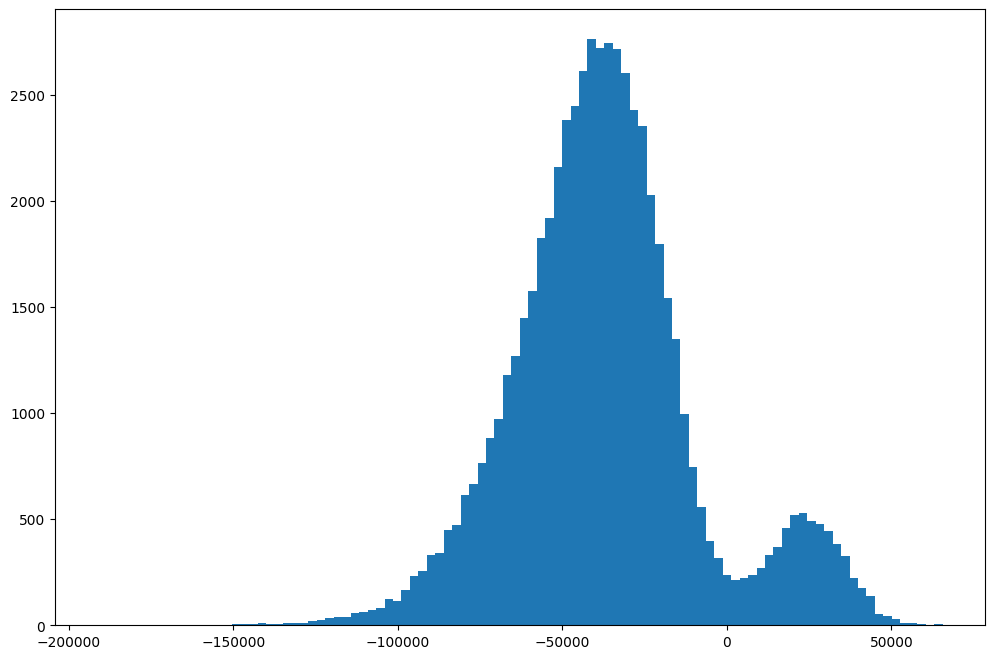

In [15]:


plt.figure(figsize=(12,8))
plt.hist(y_scores, bins=100);


C:\Users\informatika\AppData\Local\Temp\ipykernel_14456\3797512666.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(t, p, "b--",c="red")


(-0.5, 1.5)

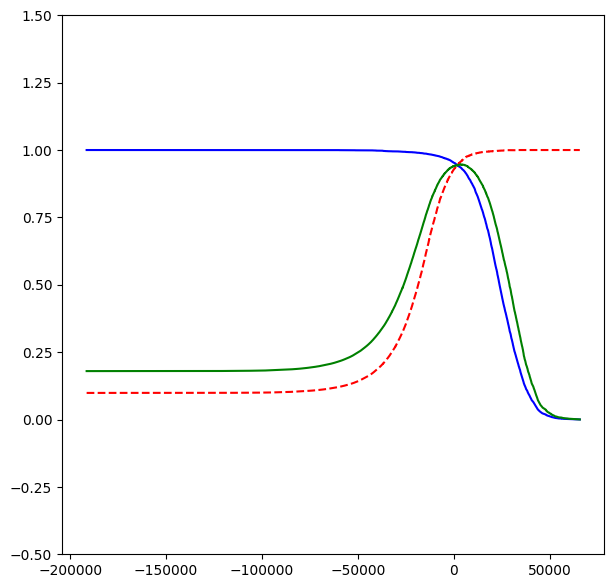

In [20]:
from sklearn.metrics import precision_recall_curve
precisions, recall, thresfolds = precision_recall_curve(y_train_0, y_scores)
plt.figure(figsize=(7,7))
p = precisions[:-1]
r = recall[:-1]
f1 = 2/(1/p + 1/r )
t = thresfolds
plt.plot(t, p, "b--",c="red")
plt.plot(t, r, c="blue")
plt.plot(t, f1, c="green")
plt.ylim([-0.5,1.5])    


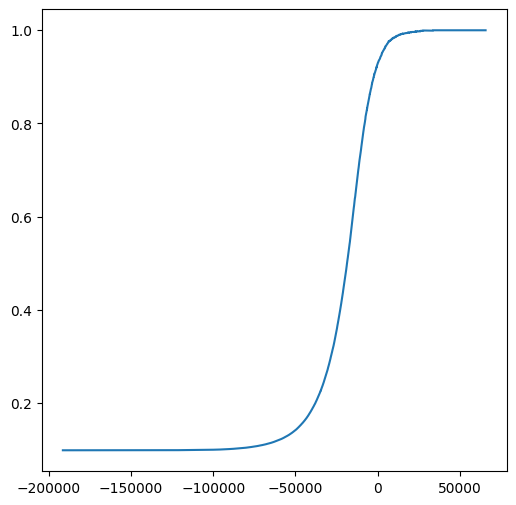

In [27]:
plt.figure(figsize=(6,6))
plt.plot(thresfolds, precisions[:-1])

In [34]:
from sklearn.metrics import precision_score, recall_score


In [33]:
idx = len(precisions[precisions < 0.9])
precisions[idx]
thresfolds[idx]
y_train_pred_90 = y_scores > thresfolds[idx]
precision_score(y_train_0, y_train_pred_90)

0.9

In [37]:
id = len(recall[recall > 0.9])
y_train_pred_90r = y_scores > thresfolds[id]
recall_score(y_train_0, y_train_pred_90r)


0.8997129832854972

In [52]:
from sklearn.metrics import roc_curve


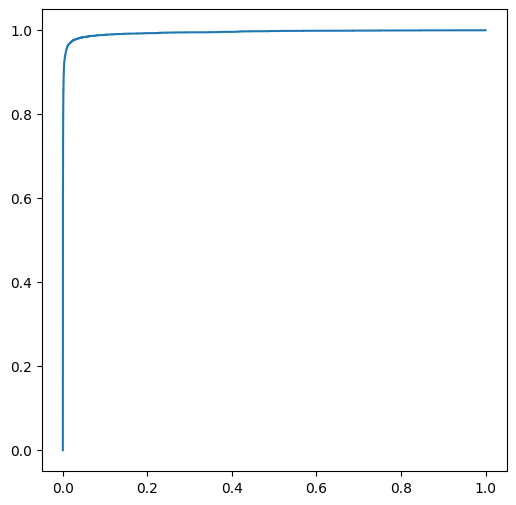

In [53]:
#roc curve
fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr)
plt.show()

In [54]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_0, y_train_pred)

0.9723597789010725

In [38]:
from sklearn.ensemble import RandomForestClassifier
clf_1 = RandomForestClassifier(random_state=0, n_estimators=100)
y_train_proba = cross_val_predict(clf_1, X_train, y_train_0, cv=3, method='predict_proba')


In [62]:
y_probas_forest=y_train_proba
y_scores_forest = y_probas_forest[:, 1]
clf_1.fit(X_train, y_train_0)


RandomForestClassifier(random_state=0)

0.9994603308116707

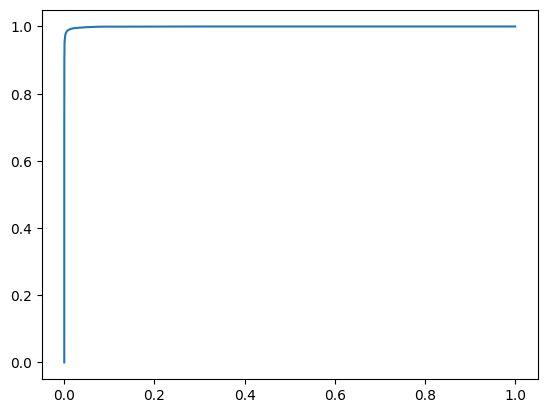

In [68]:

f, t, th = roc_curve(y_train_0, y_scores_forest)
plt.plot(f,t)
roc_auc_score(y_train_0, y_scores_forest)